
 IRIS FEATURES \ TARGET NAMES: 
  ['setosa' 'versicolor' 'virginica']

[0]:[setosa]

[1]:[versicolor]

[2]:[virginica]

 IRIS DATA :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  

In [1]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook

output_notebook()
def local_regression(x0, X, Y, tau):
    x0 = np.r_[1, x0]
    X= np.c_[np.ones(len(X)), X]
    xw = X.T * radial_kernel(x0, X, tau)
    beta = np.linalg.pinv(xw @ X) @ xw @ Y
    return x0 @ beta

def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))

n = 1000
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y	:\n",Y[1:10])
X += np.random.normal(scale=.1, size=n)
print("Normalised (10 Samples) X :\n",X[1:10])


domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples):\n",domain[1:10])

def plot_lwr(tau):
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain] 
    plot = figure(plot_width=400, plot_height=400) 
    plot.title.text='tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    return plot

show(gridplot([
[plot_lwr(10.), plot_lwr(1.)], [plot_lwr(0.1), plot_lwr(0.01)]]))


Loading BokehJS ...

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y	:
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-3.045718   -2.96555424 -2.89722496 -3.10062675 -2.91741177 -2.88026387
 -2.85390927 -2.89088209 -3.20400022]
 Xo Domain Space(10 Samples):
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


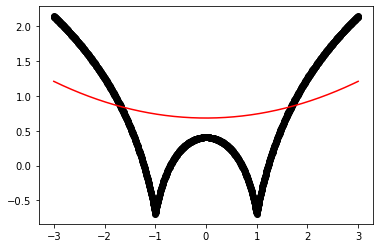

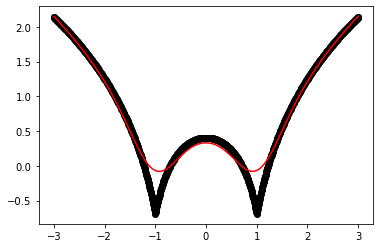

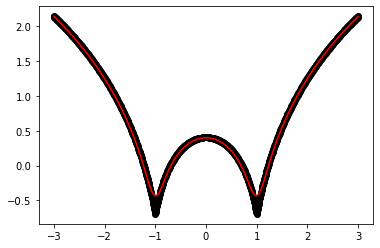

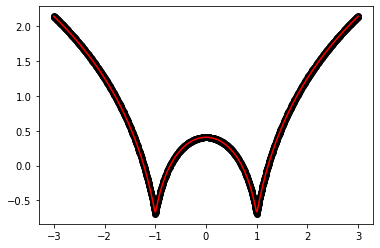

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
  
def local_regression(x0, X, Y, tau): 
    x0 = [1, x0]    
    X = [[1, i] for i in X] 
    X = np.asarray(X) 
    xw = (X.T) * np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau)) 
    beta = np.linalg.pinv(xw @ X) @ xw @ Y @ x0   
    return beta     
  
def draw(tau): 
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain] 
    plt.plot(X, Y, 'o', color='black') 
    plt.plot(domain, prediction, color='red') 
    plt.show() 
  
X = np.linspace(-3, 3, num=1000) 
domain = X 
Y = np.log(np.abs(X ** 2 - 1) + .5) 
  
  
draw(10) 
draw(0.1) 
draw(0.01) 
draw(0.0001)


 IRIS DATA : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5

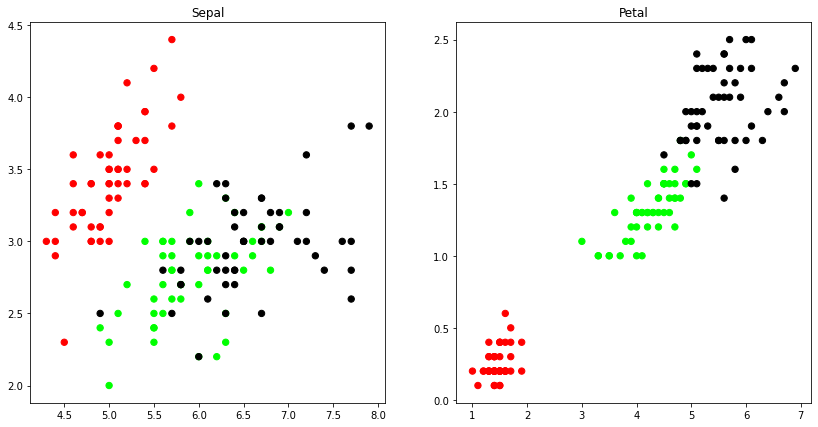

Actual Target is:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


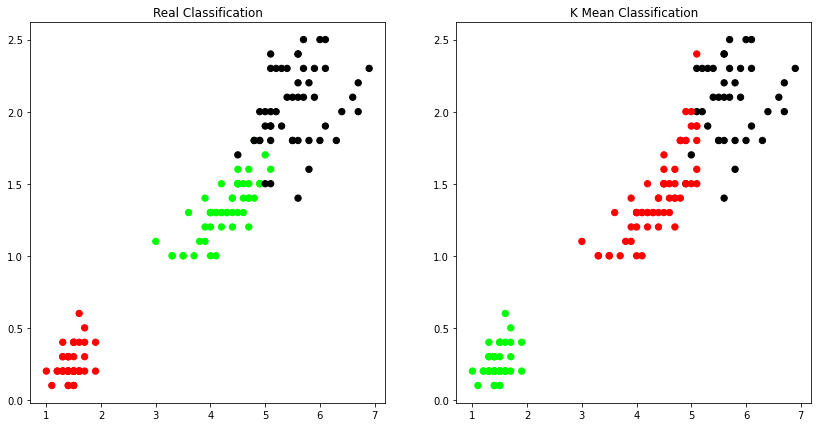


What KMeans thought: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Accuracy of KMeans is  0.8933333333333333
Confusion Matrix for KMeans is 
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
86       1.038005     0.098217      0.535409     0.395774
47      -1.506521     0.328414     -1.340227    -1.315444
108      1.038005    -1.282963      1.160620     0.790671
42      -1.748856     0.328414     -1.397064    -1.315444
6       -1.506521     0.788808     -1.340227    -1.183812


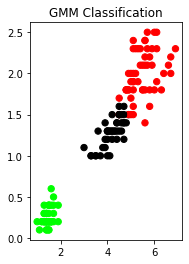


What EM thought: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy of EM is  0.9666666666666667
Confusion Matrix for EM is 
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


In [5]:


import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np


l1 = [0,1,2]
def rename(s):
	l2 = []
	for i in s:
		if i not in l2:
			l2.append(i)

	for i in range(len(s)):
		pos = l2.index(s[i])
		s[i] = l1[pos]
	
	return s

# import some data to play with
iris = datasets.load_iris()

print("\n IRIS DATA :",iris.data);
print("\n IRIS FEATURES :\n",iris.feature_names) 
print("\n IRIS TARGET  :\n",iris.target) 
print("\n IRIS TARGET NAMES:\n",iris.target_names)


# Store the inputs as a Pandas Dataframe and set the column names
X = pd.DataFrame(iris.data)

#print(X)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

#print(X.columns) #print("X:",x)
#print("Y:",y)
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

# Plot Sepal
plt.subplot(1,2,1)
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')

plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')
plt.show()

print("Actual Target is:\n", iris.target)

# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(X)

# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

# Plot the Models Classifications
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.show()

km = rename(model.labels_)
print("\nWhat KMeans thought: \n", km)
print("Accuracy of KMeans is ",sm.accuracy_score(y, km))
print("Confusion Matrix for KMeans is \n",sm.confusion_matrix(y, km))

#The GaussianMixture scikit-learn class can be used to model this problem 
#and estimate the parameters of the distributions using the expectation-maximization algorithm.

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
print("\n",xs.sample(5))

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_cluster_gmm = gmm.predict(xs)

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')
plt.show()

em = rename(y_cluster_gmm)
print("\nWhat EM thought: \n", em)
print("Accuracy of EM is ",sm.accuracy_score(y, em))
print("Confusion Matrix for EM is \n", sm.confusion_matrix(y, em))


In [17]:
import csv

with open("trainingexamples.csv") as f:
    csv_file = csv.reader(f)
    data = list(csv_file)

    specific = data[1][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]

    for i in data:
        if i[-1] == "Y":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    specific[j] = "?"
                    general[j][j] = "?"

        elif i[-1] == "N":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = "?"

        print("\nStep " + str(data.index(i)+1) + " of Candidate Elimination Algorithm")
        print(specific)
        print(general)

    gh = [] # gh = general Hypothesis
    for i in general:
        for j in i:
            if j != '?':
                gh.append(i)
                break
    print("\nFinal Specific hypothesis:\n", specific)
    print("\nFinal General hypothesis:\n", gh)


Step 1 of Candidate Elimination Algorithm
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 of Candidate Elimination Algorithm
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 3 of Candidate Elimination Algorithm
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'Same']]

Step 4 of Candidate Elimination Algorithm
['Sunny', 'Warm', '?', 'Strong', '?', '?']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm'

In [16]:
import csv
pd = open('trainingexamples.csv')
with pd  as csvFile:
    data = [tuple(line) for line in csv.reader(csvFile)]
data

def Domain(): #All possible unique values an attribute/field can hold.
    D =[]
    for i in range(len(data[0])):
        D.append(list(set([ele[i] for ele in data])))
    return D

D = Domain()
D

def consistant(h1, h2):
    for x, y in zip(h1, h2):
        if not (x == "?" or (x != "ɸ" and (x == y or y == "ɸ"))):
            return False
    return True

def candidate_elimination():
    G = {('?',)*(len(data[0]) - 1),}
    S = ['ɸ']*(len(data[0]) - 1)
    no = 0
    print("\n G[{0}]:".format(no), G)
    print("\n S[{0}]:".format(no), S)
    for item in data:
        no += 1
        inp , res = item[:-1] , item[-1]
        
        if res in "Yy": 
            i = 0 		#Remove from G any inconsistancy
            G = {g for g in G if consistant(g,inp)}
            for s,x in zip(S,inp):   		# similar to find-s
                if not s==x:
                    S[i] = '?' if s != 'ɸ' else x
                i += 1
        else:
            S = S 			#unaffected for this eg.
            Gprev = G.copy()
            for g in Gprev: 		#for each hypothesis
                if g not in G: 		# if g gets removed.
                    continue
                for i in range(len(g)):  		#for every fiels/atribute
                    if g[i] == "?":  			#if it can be more generalized.
                        for val in D[i]: 		# for each possible values in domain.
                            if inp[i] != val and val == S[i]: 		# check if this possible value in domain is applicable.
                                g_new = g[:i] + (val,) + g[i+1:]
                                G.add(g_new)
                    else:
                        G.add(g)  				# difference_update() used to remove the items from the set which is passed to it.            
                G.difference_update([h for h in G if
                                 any([consistant(h, g1) for g1 in G if h != g1])])
        print("\n G[{0}]:".format(no), G)
        print("\n S[{0}]:".format(no), S)
candidate_elimination()


 G[0]: {('?', '?', '?', '?', '?', '?')}

 S[0]: ['ɸ', 'ɸ', 'ɸ', 'ɸ', 'ɸ', 'ɸ']

 G[1]: {('?', '?', '?', '?', '?', '?')}

 S[1]: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']

 G[2]: {('?', '?', '?', '?', '?', '?')}

 S[2]: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']

 G[3]: {('?', '?', '?', '?', '?', 'Same'), ('?', 'Warm', '?', '?', '?', '?'), ('Sunny', '?', '?', '?', '?', '?')}

 S[3]: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']

 G[4]: {('?', 'Warm', '?', '?', '?', '?'), ('Sunny', '?', '?', '?', '?', '?')}

 S[4]: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [21]:
#Write a program to implement the naïve Bayesian classifier for a sample training data set
#stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.
print("\nNaive Bayes Classifier for concept learning problem")
import csv
import random
import math
import operator

def safe_div(x,y):
 if y == 0:
  return 0
 return x/y

# 1.Data Handling
# 1.1 Loading the Data from csv file of ConceptLearning dataset.
def loadCsv(filename):
  lines = csv.reader(open(filename))
  dataset = list(lines)
  for i in range(len(dataset)):
    dataset[i] = [float(x) for x in dataset[i]]
  return dataset


#1.2 Splitting the Data set into Training Set
def splitDataset(dataset, splitRatio):
  trainSize = int(len(dataset) * splitRatio)
  trainSet = []
  copy = list(dataset)
  i=0
  while len(trainSet) < trainSize:
  #index = random.randrange(len(copy))
    trainSet.append(copy.pop(i))
  return [trainSet, copy]


#2.Summarize Data
#The naive bayes model is comprised of a 
#summary of the data in the training dataset. 
#This summary is then used when making predictions.
#involves the mean and the standard deviation for each attribute, by class value

#2.1: Separate Data By Class
#Function to categorize the dataset in terms of classes 
#The function assumes that the last attribute (-1) is the class value. 
#The function returns a map of class values to lists of data instances.

def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated

#The mean is the central middle or central tendency of the data, 
# and we will use it as the middle of our gaussian distribution 
# when calculating probabilities

#2.2 : Calculate Mean
def mean(numbers):
  return safe_div(sum(numbers),float(len(numbers)))

#The standard deviation describes the variation of spread of the data, 
#and we will use it to characterize the expected spread of each attribute
#in our Gaussian distribution when calculating probabilities.

#2.3 : Calculate Standard Deviation
def stdev(numbers):
  avg = mean(numbers)
  variance = safe_div(sum([pow(x-avg,2) for x in numbers]),float(len(numbers)-1))
  return math.sqrt(variance)

#2.4 : Summarize Dataset
#Summarize Data Set for a list of instances (for a class value) 
#The zip function groups the values for each attribute across our data instances 
#into their own lists so that we can compute the mean and standard deviation values 
#for the attribute. 

def summarize(dataset):
  summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
  del summaries[-1]
  return summaries

#2.5 : Summarize Attributes By Class
#We can pull it all together by first separating our training dataset into 
#instances grouped by class.Then calculate the summaries for each attribute.

def summarizeByClass(dataset):
  separated = separateByClass(dataset)
  summaries = {}
  for classValue, instances in separated.items():
    summaries[classValue] = summarize(instances)
  print("Summarize Attributes By Class")
  print(summaries)
  print(" ")
  return summaries

#3.Make Prediction
#3.1 Calculate Probaility Density Function
def calculateProbability(x, mean, stdev):
  exponent = math.exp(-safe_div(math.pow(x-mean,2),(2*math.pow(stdev,2))))
  final = safe_div(1 , (math.sqrt(2*math.pi) * stdev)) * exponent
  return final

#3.2 Calculate Class Probabilities
def calculateClassProbabilities(summaries, inputVector):
  probabilities = {}
  for classValue, classSummaries in summaries.items():
   probabilities[classValue] = 1
  for i in range(len(classSummaries)):
    mean, stdev = classSummaries[i]
    x = inputVector[i]
    probabilities[classValue] *= calculateProbability(x, mean, stdev)
  return probabilities

#3.3 Prediction : look for the largest probability and return the associated class
def predict(summaries, inputVector):
  probabilities = calculateClassProbabilities(summaries, inputVector)
  bestLabel, bestProb = None, -1
  for classValue, probability in probabilities.items():
    if bestLabel is None or probability > bestProb:
      bestProb = probability
      bestLabel = classValue
  return bestLabel

#4.Make Predictions
# Function which return predictions for list of predictions
# For each instance
def getPredictions(summaries, testSet):
  predictions = []
  for i in range(len(testSet)):
    result = predict(summaries, testSet[i])
    predictions.append(result)
  return predictions

#5. Computing Accuracy 
def getAccuracy(testSet, predictions):
  correct = 0
  for i in range(len(testSet)):
    if testSet[i][-1] == predictions[i]:
      correct += 1
  accuracy = safe_div(correct,float(len(testSet))) * 100.0
  return accuracy

def main():
  filename = 'diabetes2.csv'
  splitRatio = 0.9
  dataset = loadCsv(filename)
  trainingSet, testSet = splitDataset(dataset, splitRatio)
  print('Split {0} rows into'.format(len(dataset)))
  print('Number of Training data: ' + (repr(len(trainingSet))))
  print('Number of Test Data: ' + (repr(len(testSet))))
  print("\nThe values assumed for the concept learning attributes are\n")
  print("OUTLOOK=> Sunny=1 Overcast=2 Rain=3\nTEMPERATURE=> Hot=1 Mild=2 Cool=3\nHUMIDITY=> High=1 Normal=2\nWIND=> Weak=1 Strong=2")
  print("TARGET CONCEPT:PLAY TENNIS=> Yes=10 No=5")
  print("\nThe Training set are:")
  for x in trainingSet:
    print(x)
    print("\nThe Test data set are:")
  for x in testSet:
    print(x)
  print("\n")

# prepare model
  summaries = summarizeByClass(trainingSet)

# test model
  predictions = getPredictions(summaries, testSet)
  actual = []
  for i in range(len(testSet)):
   vector = testSet[i]
  actual.append(vector[-1])

# Since there are five attribute values, each attribute constitutes to 20% accuracy. So if all attributes
#match with predictions then 100% accuracy
  print('Actual values: {0}%'.format(actual))
  print('Predictions: {0}%'.format(predictions))
  accuracy = getAccuracy(testSet, predictions)
  print('Accuracy: {0}%'.format(accuracy))


main()



Naive Bayes Classifier for concept learning problem
Split 768 rows into
Number of Training data: 691
Number of Test Data: 77

The values assumed for the concept learning attributes are

OUTLOOK=> Sunny=1 Overcast=2 Rain=3
TEMPERATURE=> Hot=1 Mild=2 Cool=3
HUMIDITY=> High=1 Normal=2
WIND=> Weak=1 Strong=2
TARGET CONCEPT:PLAY TENNIS=> Yes=10 No=5

The Training set are:
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]

The Test data set are:
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0]

The Test data set are:
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0]

The Test data set are:
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0]

The Test data set are:
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0]

The Test data set are:
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0, 0.0]

The Test data set are:
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0, 1.0]

The Test data set are:
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0, 0.0]

The Test data set are:
[2.0, 1